# Load data

In [1]:
from sklearn import cluster
from neupy import algorithms

import data
import plot
import evaluation
from conf import N_CLUSTERS


data_bin, words, dim = data.load_vectors("binvectors256.vec", read_first_words = 10000, sample_words=1000)

# Cluster using ART1
## Cluster visualization

Silhouette score: -0.004586388843975266


clusters,0,1,2,3,4,5,6,7,8,9
0,.,by,which,but,an,will,so,only,what,!
1,name,11,think,both,without,many,me,than,my,those
2,,2008,president,study,official,place,Thank,always,She,women
3,,public,candidate,must,remove,sources,April,fact,comments,men
4,,why,Syria,language,encyclopedia,well,head,available,User,There
5,,family,knows,end,vehicle,really,banks,clear,student,recent
6,,school,holds,job,N,something,remember,adding,'m,million
7,,issues,roads,programs,Press,find,advice,named,am,events
8,,water,factory,users,Team,today,interests,correct,earlier,schools
9,,further,doors,standard,versus,economy,Turkey,single,culture,games


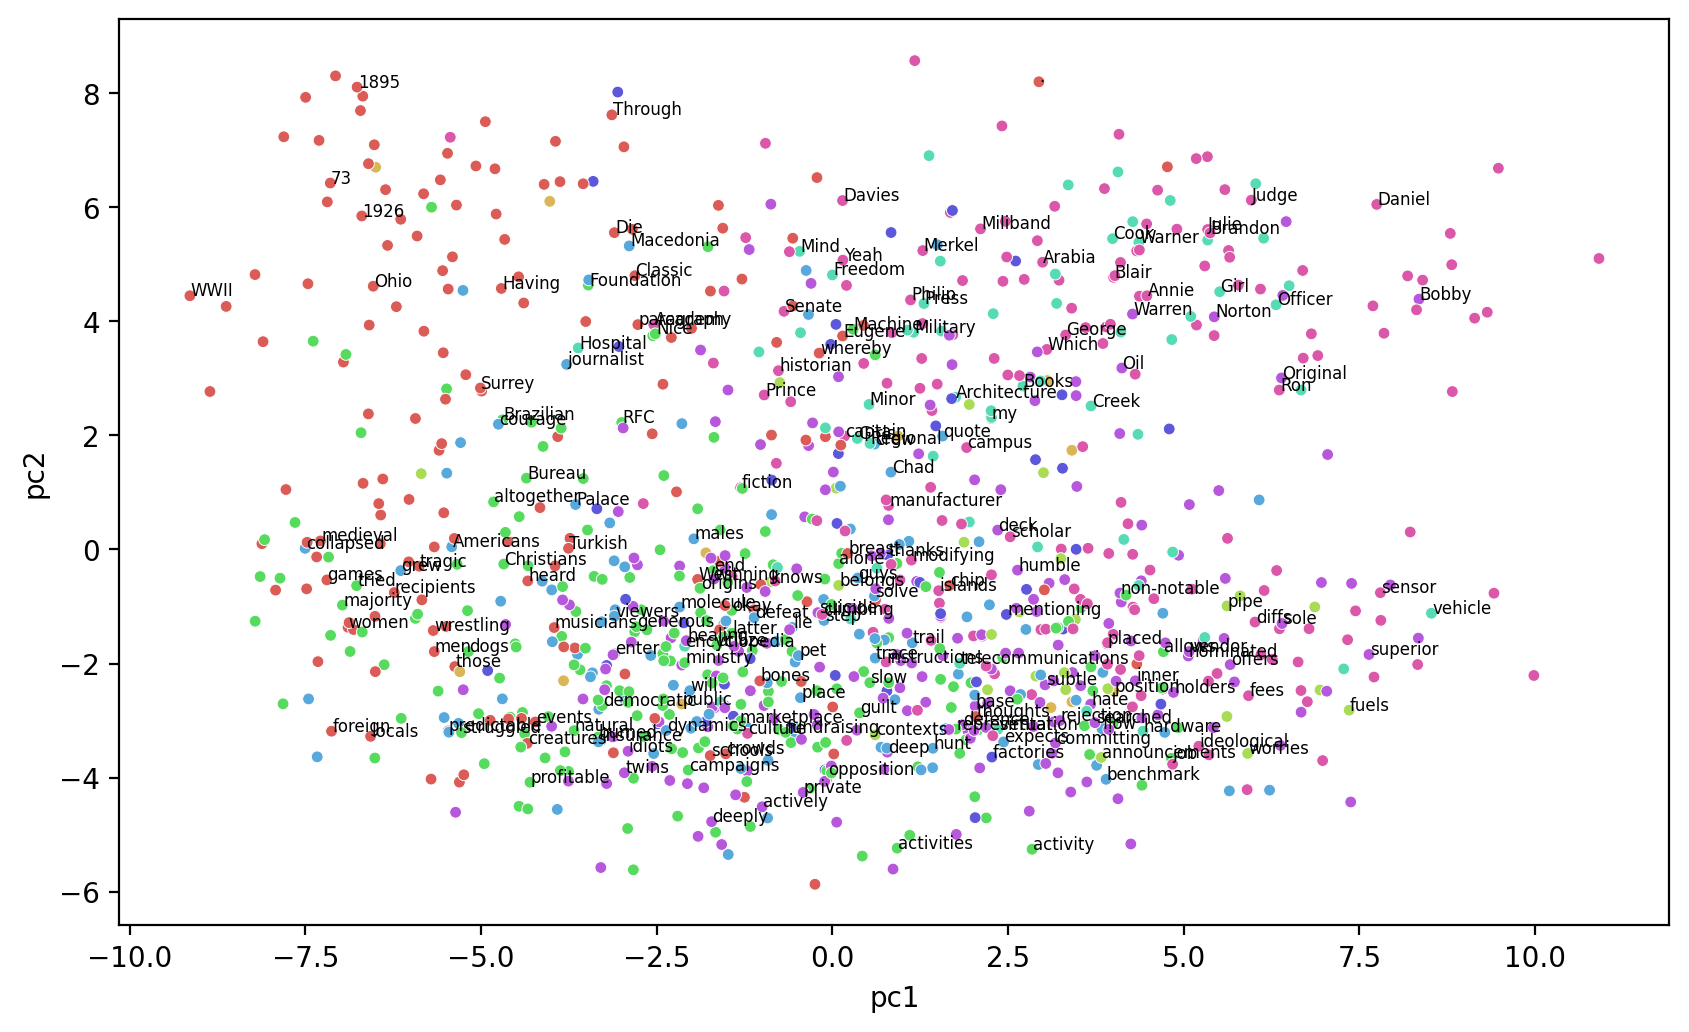

In [2]:
from conf import ART_VIGILANCE, ART_LEARNING_RATE


artnet = algorithms.ART1(
        step=ART_LEARNING_RATE,
        rho=ART_VIGILANCE,
        n_clusters=N_CLUSTERS,
        shuffle_data=False
    )
evaluation.report_model(artnet, data_bin, words, "ART")

## Explore parameters

In [6]:
results = evaluation.art_explore_parameters(data_bin, vigilances=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], learning_rates = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
display(results)


,vigilance,learning_rate,silhouette_score
0,0.1,0.01,-0.019065
1,0.1,0.02,-0.018848
2,0.1,0.05,-0.019525
3,0.1,0.10,-0.019525
4,0.1,0.15,-0.018848
...,...,...,...
115,1.0,0.30,-0.089332
116,1.0,0.35,-0.085372
117,1.0,0.40,-0.089284
118,1.0,0.45,-0.089332


AttributeError: module 'seaborn' has no attribute 'scatter'

<AxesSubplot:xlabel='vigilance', ylabel='silhouette_score'>

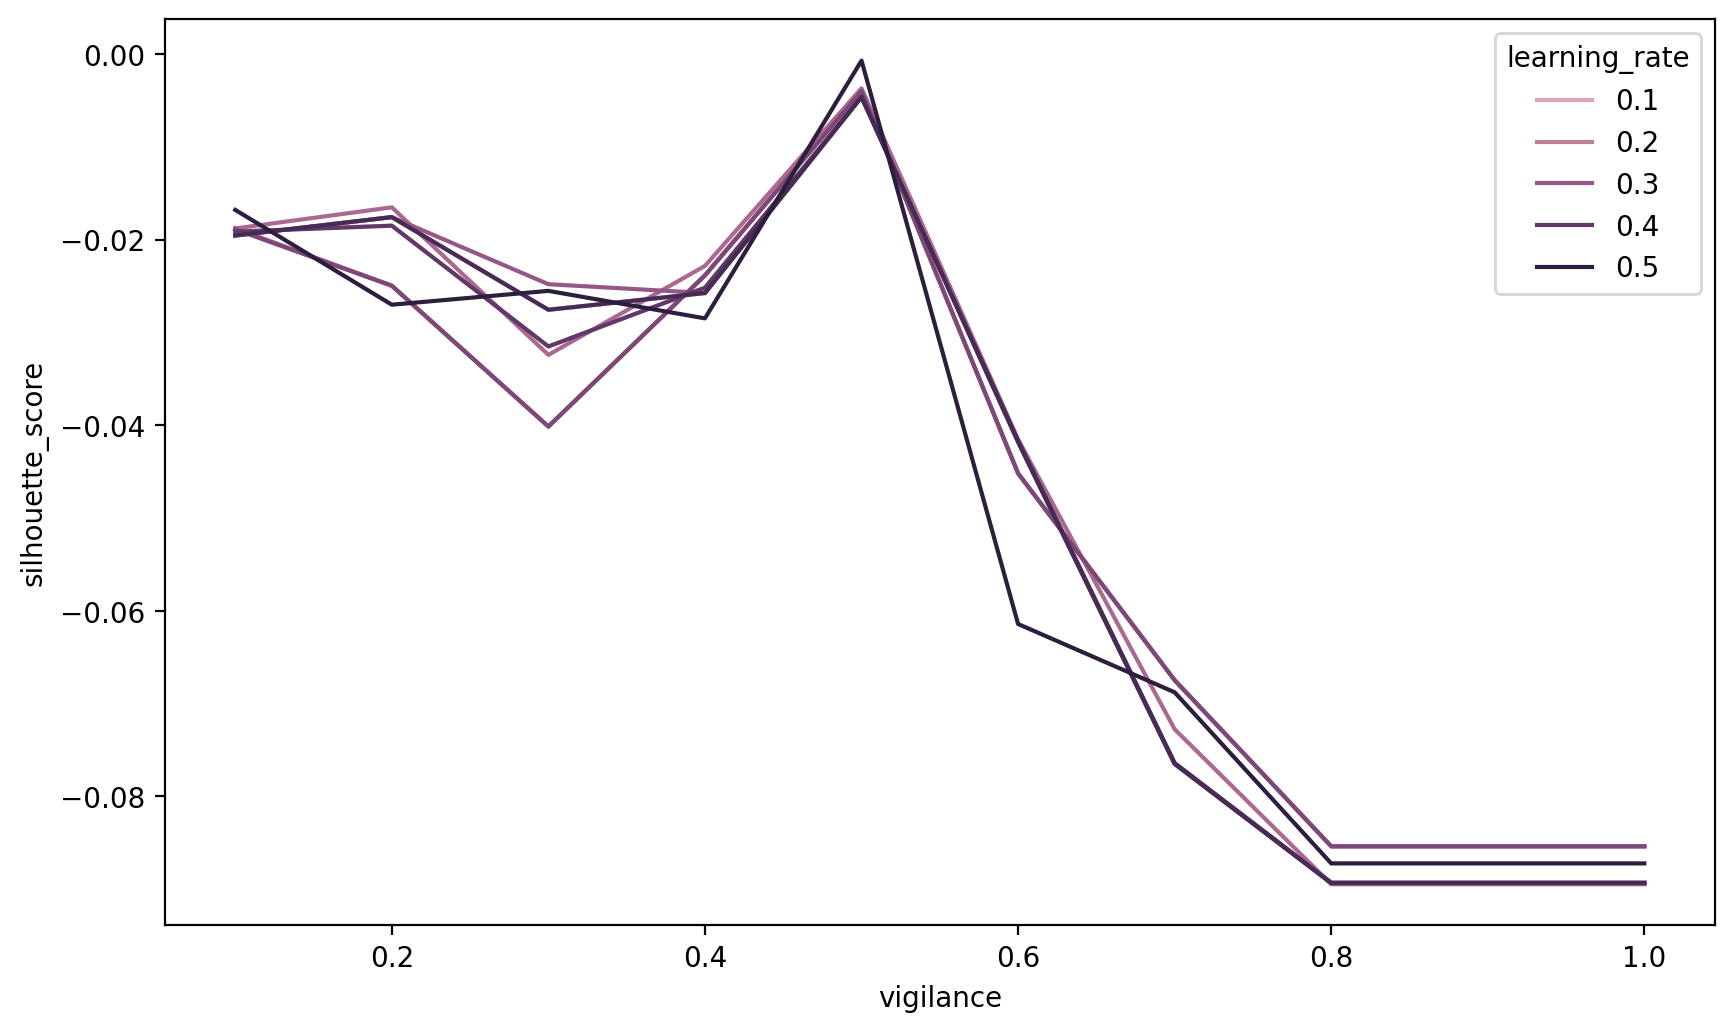

In [9]:
import seaborn as sns
sns.lineplot(data=results, x="vigilance", y="silhouette_score", hue="learning_rate")

# Other clustering methods

## Agglomerative clustering

In [ ]:

# For binary, manhattan=hamming
agg = cluster.AgglomerativeClustering(n_clusters=N_CLUSTERS, affinity="manhattan", linkage="average")
evaluation.report_model(agg, data_bin, words, "Agglomerative clustering")

## OPTICS

In [ ]:

opt = cluster.OPTICS(metric="hamming")
evaluation.report_model(opt, data_bin, words, "OPTICS")

## Affinity propagation (distance metric correct?)

In [ ]:
aff = cluster.AffinityPropagation(random_state=None)
evaluation.report_model(aff, data_bin, words, "Affinity propagation")

## SOM (NeuPy)

In [ ]:
import numpy as np


som_neupy = algorithms.competitive.sofm.SOFM(n_inputs=dim, n_outputs=N_CLUSTERS)
evaluation.report_model(som_neupy, data_bin, words, "SOM-neupy")

## SOM (MiniSOM)

In [ ]:
from minisom import MiniSom
som_minisom = MiniSom(1, N_CLUSTERS, dim, learning_rate=0.1, sigma=0.5)
evaluation.report_model(som_minisom, data_bin, words, "SOM-minisom", n_clusters=N_CLUSTERS)